In [20]:
!pip install numba

In [21]:
import numpy as np
from numba import njit, prange
import time

In [22]:
N = 3

In [23]:
@njit(parallel=True)
def multiply_matrix(A, B, result):
    for i in prange(N):
        for j in range(N):
            result[i, j] = 0
            for k in range(N):
                result[i, j] += A[i, k] * B[k, j]

In [24]:
if __name__ == "__main__":
    A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
    B = np.array([[9, 8, 7], [6, 5, 4], [3, 2, 1]])
    result = np.zeros((N, N))

    # Perform matrix multiplication
    start_time = time.time()
    multiply_matrix(A, B, result)
    end_time = time.time()

    # Display matrices and result
    print("Matrix A:")
    print(A)
    print("\nMatrix B:")
    print(B)
    print("\nResult Matrix:")
    print(result)

    # Display execution time
    print("\nMatrix multiplication took", end_time - start_time, "seconds.")

Matrix A:
[[1 2 3]
 [4 5 6]
 [7 8 9]]

Matrix B:
[[9 8 7]
 [6 5 4]
 [3 2 1]]

Result Matrix:
[[ 30.  24.  18.]
 [ 84.  69.  54.]
 [138. 114.  90.]]

Matrix multiplication took 0.7195730209350586 seconds.


In [25]:
def measure_time(matrix_size, num_threads=1):
    A = np.random.rand(matrix_size, matrix_size)
    B = np.random.rand(matrix_size, matrix_size)
    result = np.zeros((matrix_size, matrix_size))

    start_time = time.time()
    multiply_matrix(A, B, result)
    end_time = time.time()

    return max(end_time - start_time, 1e-10)

In [26]:
import matplotlib.pyplot as plt

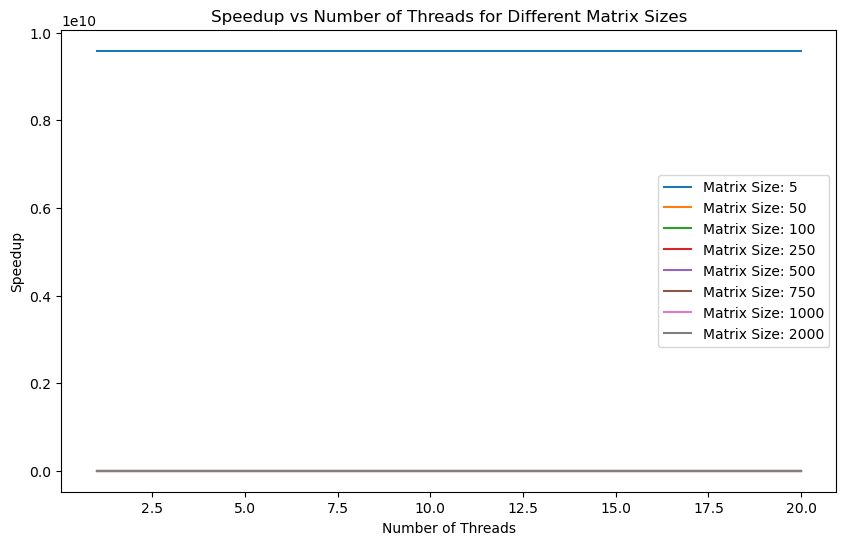

In [27]:
def main():
    matrix_sizes = [5, 50, 100, 250, 500, 750, 1000, 2000]
    thread_counts = [1, 2, 4, 8, 10, 15, 20]

    serial_runtimes = []
    parallel_runtimes = []

    for size in matrix_sizes:
        serial_time = measure_time(size, num_threads=1)
        serial_runtimes.append(serial_time)

        parallel_times = []
        for threads in thread_counts:
            parallel_time = measure_time(size, num_threads=threads)
            parallel_times.append(parallel_time)

        parallel_runtimes.append(parallel_times)

    # Plotting
    plt.figure(figsize=(10, 6))

    for i, size in enumerate(matrix_sizes):
        plt.plot(thread_counts, [serial_runtimes[i] / t for t in parallel_runtimes[i]], label=f"Matrix Size: {size}")

    plt.xlabel("Number of Threads")
    plt.ylabel("Speedup")
    plt.title("Speedup vs Number of Threads for Different Matrix Sizes")
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()

In [28]:
import pandas as pd

In [29]:
def main():
    matrix_sizes = [5, 50, 100, 250, 500, 750, 1000, 2000]
    thread_counts = [1, 2, 4, 8, 10, 15, 20]

    results = []

    for size in matrix_sizes:
        serial_time = measure_time(size, num_threads=1)

        for threads in thread_counts:
            parallel_time = measure_time(size, num_threads=threads)
            speedup = serial_time / parallel_time
            efficiency = speedup / threads
            results.append({
                'Matrix Size': size,
                'Threads': threads,
                'Serial Time': serial_time,
                'Parallel Time': parallel_time,
                'Speedup': speedup,
                'Efficiency': efficiency
            })

    df = pd.DataFrame(results)
    print(df)

if __name__ == "__main__":
    main()

    Matrix Size  Threads   Serial Time  Parallel Time  Speedup  Efficiency
0             5        1  1.000000e-10   1.000000e-10      1.0    1.000000
1             5        2  1.000000e-10   1.000000e-10      1.0    0.500000
2             5        4  1.000000e-10   1.000000e-10      1.0    0.250000
3             5        8  1.000000e-10   1.000000e-10      1.0    0.125000
4             5       10  1.000000e-10   1.000000e-10      1.0    0.100000
5             5       15  1.000000e-10   1.000000e-10      1.0    0.066667
6             5       20  1.000000e-10   1.000000e-10      1.0    0.050000
7            50        1  1.000000e-10   1.000000e-10      1.0    1.000000
8            50        2  1.000000e-10   1.000000e-10      1.0    0.500000
9            50        4  1.000000e-10   1.000000e-10      1.0    0.250000
10           50        8  1.000000e-10   1.000000e-10      1.0    0.125000
11           50       10  1.000000e-10   1.000000e-10      1.0    0.100000
12           50       15 

In [30]:
def main():
    matrix_sizes = [5, 50, 100, 250, 500, 750, 1000, 2000]
    thread_counts = [1, 2, 4, 8, 10, 15, 20]

    data = {'Matrix Size': [], 'Threads': [], 'Serial Time': [], 'Parallel Time': []}

    for size in matrix_sizes:
        serial_time = measure_time(size, num_threads=1)

        for threads in thread_counts:
            parallel_time = measure_time(size, num_threads=threads)
            data['Matrix Size'].append(size)
            data['Threads'].append(threads)
            data['Serial Time'].append(serial_time)
            data['Parallel Time'].append(parallel_time)

    df = pd.DataFrame(data)
    df.to_csv('matrix_multiplication_results.csv', index=False)

if __name__ == "__main__":
    main()

In [31]:
df2 = pd.read_csv('matrix_multiplication_results.csv')
df2

,Matrix Size,Threads,Serial Time,Parallel Time
0,5,1,1.000000e-10,1.000000e-10
1,5,2,1.000000e-10,1.000000e-10
2,5,4,1.000000e-10,1.000000e-10
3,5,8,1.000000e-10,1.000000e-10
4,5,10,1.000000e-10,1.000000e-10
5,5,15,1.000000e-10,1.000000e-10
6,5,20,1.000000e-10,1.000000e-10
7,50,1,8.871555e-04,1.000000e-10
8,50,2,8.871555e-04,1.000000e-10
9,50,4,8.871555e-04,1.000000e-10


In [32]:
import numpy as np
import threading
import time
import pandas as pd

In [33]:
def multiply_matrix(A, B, result, start_row, end_row):
    try:
        for i in range(start_row, end_row):
            for j in range(N):
                result[i, j] = 0
                for k in range(N):
                    result[i, j] += A[i, k] * B[k, j]
    except NameError as e:
        # Handle the exception as per your requirements
        print(f"Exception in thread {threading.current_thread().name}: {e}")

In [34]:
def measure_time(matrix_size, num_threads=1):
    A = np.random.rand(matrix_size, matrix_size)
    B = np.random.rand(matrix_size, matrix_size)
    result = np.zeros((matrix_size, matrix_size))

    # Ensure at least one row per thread
    chunk_size = max(1, matrix_size // num_threads)
    threads = []

    start_time = time.time()

    for i in range(0, matrix_size, chunk_size):
        end_row = min(i + chunk_size, matrix_size)
        thread = threading.Thread(target=multiply_matrix, args=(A, B, result, i, end_row))
        thread.start()
        threads.append(thread)

    for thread in threads:
        thread.join()

    end_time = time.time()

    return max(end_time - start_time, 1e-10)

In [35]:
def main():
    matrix_sizes = [5, 50, 100, 250, 500, 750, 1000, 2000, 5000]
    thread_counts = [1, 2, 4, 8, 10, 15, 20]

    results = []

    for size in matrix_sizes:
        serial_time = measure_time(size, num_threads=1)

        for threads in thread_counts:
            parallel_time = measure_time(size, num_threads=threads)
            speedup = serial_time / parallel_time
            efficiency = speedup / threads
            results.append({
                'Matrix Size': size,
                'Threads': threads,
                'Serial Time': serial_time,
                'Parallel Time': parallel_time,
                'Speedup': speedup,
                'Efficiency': efficiency
            })

    df = pd.DataFrame(results)
    df.to_csv('matrix_multiplication_results.csv', index=False)
    
df

In [36]:
if __name__ == "__main__":
    main()

    Matrix Size  Threads   Serial Time  Parallel Time       Speedup  \
0             5        1  1.000000e-10   1.000000e-10  1.000000e+00   
1             5        2  1.000000e-10   1.000000e-10  1.000000e+00   
2             5        4  1.000000e-10   1.000000e-10  1.000000e+00   
3             5        8  1.000000e-10   1.207852e-02  8.279158e-09   
4             5       10  1.000000e-10   1.172543e-03  8.528475e-08   
..          ...      ...           ...            ...           ...   
58         5000        4  8.007121e-02   9.450865e-02  8.472369e-01   
59         5000        8  8.007121e-02   7.837725e-02  1.021613e+00   
60         5000       10  8.007121e-02   9.436274e-02  8.485469e-01   
61         5000       15  8.007121e-02   9.357333e-02  8.557055e-01   
62         5000       20  8.007121e-02   9.592247e-02  8.347493e-01   

      Efficiency  
0   1.000000e+00  
1   5.000000e-01  
2   2.500000e-01  
3   1.034895e-09  
4   8.528475e-09  
..           ...  
58  2.118092e-